# MOVIE LENS DATA SET

In [3]:
import os
os.chdir('/Users/tinapraveen/Desktop/MovieLens')
os.getcwd()

'/Users/tinapraveen/Desktop/MovieLens'

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
#import movie data
movies= pd.read_csv('/Users/tinapraveen/Desktop/MovieLens/movies.csv')
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [58]:
# function to split the genres
def tidy_split(df, column, sep='|', keep=False):
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df




In [60]:
# 1.c Assign genres to each movie: each movie is assigned multiple genres.
movies=tidy_split(movies, 'genres', sep='|')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy


In [6]:
#import ratings data
ratings= pd.read_csv('/Users/tinapraveen/Desktop/MovieLens/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [7]:
#Check for null values
print("Null values in movies dataframe", movies.isnull().sum())
print("Null values in ratings dataframe", ratings.isnull().sum())

Null values in movies dataframe movieId    0
title      0
genres     0
dtype: int64
Null values in ratings dataframe userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [61]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54406 entries, 0 to 27277
Data columns (total 3 columns):
movieId    54406 non-null int64
title      54406 non-null object
genres     54406 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


In [62]:
#Create a separate column 'Year'
movies['year']=movies.title.str.extract("\((\d{4})\)",expand=True)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure,1995
0,1,Toy Story (1995),Animation,1995
0,1,Toy Story (1995),Children,1995
0,1,Toy Story (1995),Comedy,1995
0,1,Toy Story (1995),Fantasy,1995


In [63]:
#Check for null values after adding new column 'Year'
print("Null values in movies dataframe", movies.isnull().sum())

Null values in movies dataframe movieId     0
title       0
genres      0
year       30
dtype: int64


In [64]:
#Dropping the null values and verify
movies.dropna(inplace=True)
print("Null values in movies dataframe", movies.isnull().sum())

Null values in movies dataframe movieId    0
title      0
genres     0
year       0
dtype: int64


In [71]:
#convert year into integer data type
movies['year']=movies['year'].astype(int)

In [ ]:
#Merge movies and ratings dataframes on movie_ID
df=pd.merge(movies,ratings,on='movieId')


In [15]:
df.drop(['timestamp'], inplace = True, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19999858 entries, 0 to 19999857
Data columns (total 6 columns):
movieId    int64
title      object
genres     object
year       int64
userId     int64
rating     float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.0+ GB


In [68]:
# 1.b. Normalize the year of movie release so that 
#1990-later is "New",
#1970s/1980s is "Medium"
# 1960s or before is "Old"

def f(row):
    if row['year'] >= 1990:
        val = 'new'
    elif row['year'] <= 1960:
        val = 'old'
    else:
        val = 'medium'
    return val



In [73]:
df['norm-year']=df.apply(f,axis=1)

In [74]:
df.head()

,movieId,title,genres,year,userId,rating,timestamp,norm-year
0,1,Toy Story (1995),Adventure,1995,3,4.0,944919407,new
1,1,Toy Story (1995),Adventure,1995,6,5.0,858275452,new
2,1,Toy Story (1995),Adventure,1995,8,4.0,833981871,new
3,1,Toy Story (1995),Adventure,1995,10,4.0,943497887,new
4,1,Toy Story (1995),Adventure,1995,11,4.5,1230858821,new


In [75]:
#1.a.&2.a. compute the average rating of each movie Sort the movies by their average rating. 
avg_rating_movie = pd.DataFrame(df.groupby('title',as_index=False)['rating'].mean().rename(columns={'rating':'avg_rating'}))


In [76]:
avg_rating_movie.sort_values('avg_rating').head()

,title,avg_rating
20759,Shatter Dead (1994),0.5
25719,Wheelmen (2005),0.5
17119,Odd Girl Out (2005),0.5
1282,Andrew Dice Clay: Indestructible (2012),0.5
22389,Sundome (2007),0.5


In [77]:
#2.b Find the median of average rating. 
median_rating=avg_rating_movie['avg_rating'].median()
print("Median of average rating:",median_rating)


Median of average rating: 3.235294117647059


In [78]:
#2.c Pick top 20%, bottom 20% and middle 20% of the movies. 
#  call them "Best", "Worst and "OK" respectively. 
#Since top,bottom and middle 20% are only categorized, 
#the movies with average ratings falling in between 60%-80%(uncat2) and 20%-40%(uncat1) remains uncategorized

avg_rating_movie['avg_rating_categories']=pd.qcut(avg_rating_movie['avg_rating'],
                                                  5,labels=["Worst","uncat1","OK","uncat2",
                                                            "Best"])



avg_rating_movie.head()


,title,avg_rating,avg_rating_categories
0,"""Great Performances"" Cats (1998)",2.748387,uncat1
1,#chicagoGirl: The Social Network Takes on a Di...,3.666667,Best
2,$ (Dollars) (1971),2.833333,uncat1
3,$5 a Day (2008),2.871795,uncat1
4,$9.99 (2008),3.009091,uncat1


In [79]:
#Display few best movies
cat=['Best']
avg_rating_movie[avg_rating_movie.avg_rating_categories.isin(cat)].head()

,title,avg_rating,avg_rating_categories
1,#chicagoGirl: The Social Network Takes on a Di...,3.666667,Best
6,'71 (2014),3.657143,Best
17,(500) Days of Summer (2009),3.804231,Best
54,100 Years of Evil (2010),4.000000,Best
63,102 Minutes That Changed America (2008),3.700000,Best


In [86]:
df1 = pd.merge(df,avg_rating_movie,on='title')
df1.head()

,movieId,title,genres,year,userId,rating,timestamp,avg_rating,avg_rating_categories
0,1,Toy Story (1995),Adventure,1995,3,4.0,944919407,3.92124,Best
1,1,Toy Story (1995),Adventure,1995,6,5.0,858275452,3.92124,Best
2,1,Toy Story (1995),Adventure,1995,8,4.0,833981871,3.92124,Best
3,1,Toy Story (1995),Adventure,1995,10,4.0,943497887,3.92124,Best
4,1,Toy Story (1995),Adventure,1995,11,4.5,1230858821,3.92124,Best


In [27]:
# we will be analysing the unique rows in data frame 

In [87]:
df_distinct=df1.drop_duplicates(subset='title', keep='last')
df_distinct.head()

,movieId,title,genres,year,userId,rating,timestamp,avg_rating,avg_rating_categories
248474,1,Toy Story (1995),Fantasy,1995,138493,3.5,1255817134,3.921240,Best
315203,2,Jumanji (1995),Fantasy,1995,138493,4.0,1258390451,3.211977,OK
340673,3,Grumpier Old Men (1995),Romance,1995,138484,4.0,836155361,3.151040,OK
348941,4,Waiting to Exhale (1995),Romance,1995,138382,4.0,915039879,2.861393,uncat1
361102,5,Father of the Bride Part II (1995),Comedy,1995,138474,4.0,966404541,3.064592,OK


In [29]:
df_distinct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 49694 to 19999857
Data columns (total 9 columns):
movieId                  26707 non-null int64
title                    26707 non-null object
assigned_genres          26707 non-null object
year                     26707 non-null int64
userId                   26707 non-null int64
rating                   26707 non-null float64
norm-year                26707 non-null object
avg_rating               26707 non-null float64
avg_rating_categories    26707 non-null category
dtypes: category(1), float64(2), int64(3), object(3)
memory usage: 1.9+ MB


In [ ]:
df_distinct['genre_category'] = df_distinct['assigned_genres'].astype('category')
df_distinct['year_category'] = df_distinct['norm-year'].astype('category')

In [31]:
df_distinct.head()

,movieId,title,assigned_genres,year,userId,rating,norm-year,avg_rating,avg_rating_categories,genre_category,year_category
49694,1,Toy Story (1995),Adventure,1995,138493,3.5,new,3.921240,Best,Adventure,new
71937,2,Jumanji (1995),Adventure,1995,138493,4.0,new,3.211977,OK,Adventure,new
84672,3,Grumpier Old Men (1995),Comedy,1995,138484,4.0,new,3.151040,OK,Comedy,new
87428,4,Waiting to Exhale (1995),Comedy,1995,138382,4.0,new,2.861393,uncat1,Comedy,new
99589,5,Father of the Bride Part II (1995),Comedy,1995,138474,4.0,new,3.064592,OK,Comedy,new


In [ ]:
df_final=df_distinct.loc[:,['year_category','genre_category','avg_rating_categories']]
df_final.info()

In [35]:
# 3.Run Chi- square test of independence against year and  average ratings
import scipy.stats as stats
import operator
from scipy.stats import chi2_contingency

In [36]:
df_final.head()

,year_category,genre_category,avg_rating_categories
49694,new,Adventure,Best
71937,new,Adventure,OK
84672,new,Comedy,OK
87428,new,Comedy,uncat1
99589,new,Comedy,OK


In [38]:
crosstab=pd.crosstab(df_final['year_category'],df_final['avg_rating_categories'])
crosstab

avg_rating_categories,Worst,uncat1,OK,uncat2,Best
year_category,,,,,
new,3182,3489,3312,3315,3580
medium,1298,1165,1144,1172,1289
old,862,760,801,778,560


In [39]:
stats.chi2_contingency(crosstab)

(110.94697217362419,
 2.4320180353381342e-20,
 8,
 array([[3375.97918149, 3421.48096005, 3322.26180402, 3327.31755719,
         3430.96049725],
        [1213.73632381, 1230.09518104, 1194.42378403, 1196.24143483,
         1233.50327629],
        [ 752.2844947 ,  762.42385891,  740.31441195,  741.44100798,
          764.53622646]]))

The chi square test has a p-value of  2.4320180353381342e-20 and expected frequencies are greater than 5 , Chi square test can be trusted.
Here we can reject the null hypothesis for the alternative hypothesis wihch states that average rating and 

In [40]:
crosstab1=pd.crosstab(df_final['genre_category'],df_final['avg_rating_categories'])
crosstab1

avg_rating_categories,Worst,uncat1,OK,uncat2,Best
genre_category,,,,,
Adventure,222,301,266,264,275
Comedy,1169,1376,1421,1225,1472
Action,447,747,823,526,918
Drama,1934,1670,1303,1850,951
Crime,351,347,337,320,230
Children,47,79,86,59,134
Mystery,17,29,40,25,28
Documentary,811,315,268,557,222
Animation,126,96,89,133,116


In [173]:
stats.chi2_contingency(crosstab1)

(2595.7610351055578,
 0.0,
 76,
 array([[2.65629835e+02, 2.69210020e+02, 2.61403228e+02, 2.61801026e+02,
         2.69955892e+02],
        [1.33274969e+03, 1.35071262e+03, 1.31154345e+03, 1.31353933e+03,
         1.35445490e+03],
        [6.92277755e+02, 7.01608342e+02, 6.81262478e+02, 6.82299210e+02,
         7.03552215e+02],
        [1.54177317e+03, 1.56255334e+03, 1.51724102e+03, 1.51954993e+03,
         1.56688254e+03],
        [3.17035609e+02, 3.21308646e+02, 3.11991051e+02, 3.12465833e+02,
         3.22198862e+02],
        [8.10090987e+01, 8.21009473e+01, 7.97201108e+01, 7.98414273e+01,
         8.23284158e+01],
        [2.78031228e+01, 2.81778560e+01, 2.73607294e+01, 2.74023664e+01,
         2.82559254e+01],
        [4.34648819e+02, 4.40507058e+02, 4.27732842e+02, 4.28383757e+02,
         4.41727525e+02],
        [1.12012581e+02, 1.13522298e+02, 1.10230277e+02, 1.10398023e+02,
         1.13836822e+02],
        [5.50061782e+01, 5.57475568e+01, 5.41309395e+01, 5.42133149e+01,
    

The chi square test has a p-value of 0 and expected frequencies are greater than 5 , Chi square test can be trusted.
Here we fail to reject the null hypothesis.

In [41]:
# df-distinct data frame has the distinct rows of movies with the normalized years and assigned genres. 
df_final1=df_distinct.loc[:,['movieId','title','year_category','genre_category','avg_rating_categories']]
df_final1.head()


,movieId,title,year_category,genre_category,avg_rating_categories
49694,1,Toy Story (1995),new,Adventure,Best
71937,2,Jumanji (1995),new,Adventure,OK
84672,3,Grumpier Old Men (1995),new,Comedy,OK
87428,4,Waiting to Exhale (1995),new,Comedy,uncat1
99589,5,Father of the Bride Part II (1995),new,Comedy,OK


In [48]:
# Movies produced in each normalized_year category
df_final1.groupby(['avg_rating_categories','year_category']).size()


avg_rating_categories  year_category
Worst                  medium           1289
                       new              3580
                       old               560
uncat1                 medium           1144
                       new              3312
                       old               801
OK                     medium           1165
                       new              3489
                       old               760
uncat2                 medium           1172
                       new              3315
                       old               778
Best                   medium           1298
                       new              3182
                       old               862
dtype: int64

When year of movies are categorized , it can be seen from data that in all the 3 categories, namely , Best,Worst and OK ,most movies are “new”. This infers that there has been more movies produced after 1990 and/or there has been more users rating movies than during older years. 

In [46]:
df_final1.groupby(['avg_rating_categories','genre_category']).size()

avg_rating_categories  genre_category    
Worst                  (no genres listed)     106
                       Action                 918
                       Adventure              275
                       Animation              116
                       Children               134
                       Comedy                1472
                       Crime                  230
                       Documentary            222
                       Drama                  951
                       Fantasy                 41
                       Film-Noir                1
                       Horror                 684
                       IMAX                     1
                       Musical                 25
                       Mystery                 28
                       Romance                 37
                       Sci-Fi                  61
                       Thriller                76
                       War                      5
        

In [51]:
# Movies produced in each normalized_year category
df_final1.groupby(['year_category','genre_category']).size()

year_category  genre_category    
medium         (no genres listed)      71
               Action                 920
               Adventure              360
               Animation              125
               Children                96
               Comedy                1466
               Crime                  311
               Documentary            235
               Drama                 1676
               Fantasy                 46
               Film-Noir                3
               Horror                 482
               Musical                 21
               Mystery                 40
               Romance                 15
               Sci-Fi                  48
               Thriller                62
               War                     13
               Western                 78
new            (no genres listed)     116
               Action                2325
               Adventure              713
               Animation              384


Majority of new movies fall in genres,Drama Comedy and Action.
Drama and Comedy have been the genres persisted throughout all the years.

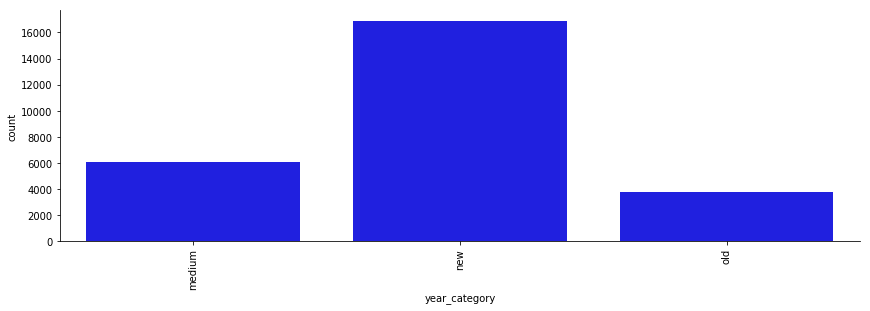

In [52]:
#movie count by normalized_year
import seaborn as sns
sns.factorplot("year_category", data=df_final1, aspect=3, kind="count", color="b").set_xticklabels(rotation=90)
